<a href="https://colab.research.google.com/github/Huy987asd/BT/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 4s 0us/step


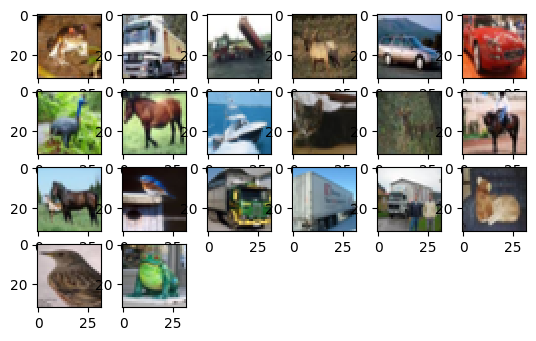

(50000, 10)
(10000, 10)


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
782/782 [==============================] - 282s 357ms/step - loss: 2.1897 - accuracy: 0.1727
Epoch 2/20
782/782 [==============================] - 275s 351ms/step - loss: 1.9531 - accuracy: 0.2826
Epoch 3/20
782/782 [==============================] - 275s 351ms/step - loss: 1.7390 - accuracy: 0.3593
Epoch 4/20
782/782 [==============================] - 275s 352ms/step - loss: 1.6038 - accuracy: 0.4096
Epoch 5/20
782/782 [==============================] - 274s 351ms/step - loss: 1.5160 - accuracy: 0.4465
Epoch 6/20
782/782 [==============================] - 273s 349ms/step - loss: 1.4487 - accuracy: 0.4745
Epoch 7/20
782/782 [==============================] - 274s 350ms/step - loss: 1.3959 - accuracy: 0.4942
Epoch 8/20
782/782 [==============================] - 275s 352ms/step - loss: 1.3511 - accuracy: 0.5130
Epoch 9/20
782/782 [==============================] - 272s 348ms/step - loss: 1.3098 - accuracy: 0.5315
Epoch 10/20
782/782 [==============================] - 275s 351m

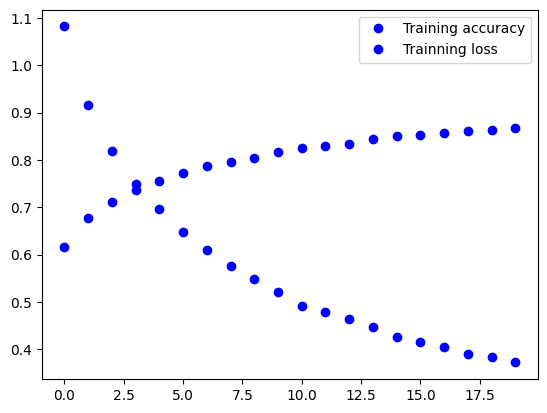

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
for i in range(20):
    plt.subplot(5, 6, i + 1)
    plt.imshow(x_train[i],cmap='gray',
               interpolation='none')
plt.show()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU,Dropout,Activation, ReLU
from keras.optimizers import Adam,SGD

model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
batch_size=64
epochs=20

from keras.losses import categorical_crossentropy
sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov= True)
model.compile(loss= categorical_crossentropy, optimizer= sgd, metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

#ve bieu do

from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs, verbose=1)
model.save('model1.h5')
loss=train.history['loss']
accuracy=train.history['accuracy']
print(accuracy)
print(loss)
plt.plot(accuracy,'bo',label='Training accuracy')
plt.plot(loss,'bo',label='Trainning loss')
plt.legend()
plt.show()
